In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch import Pitch

from sklearn.cluster import KMeans

In [17]:
#import data
df = pd.read_csv('kmeanstutorial.csv')

In [18]:
df.head()

,Unnamed: 0,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",France,00:00:00.000,Starting XI,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Croatia,00:00:00.000,Starting XI,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Croatia,00:00:00.000,Half Start,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Croatia,00:00:00.000,Half Start,NaN


In [19]:
df.columns

Index(['Unnamed: 0', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pa

In [20]:
df = df[['team','type','location','pass_end_location']]

In [21]:
df.head()

,team,type,location,pass_end_location
0,France,Starting XI,NaN,NaN
1,Croatia,Starting XI,NaN,NaN
2,France,Half Start,NaN,NaN
3,Croatia,Half Start,NaN,NaN
4,Croatia,Half Start,NaN,NaN


In [22]:
df = df[(df['team']=='France')&(df['type']=='Pass')].reset_index()

In [23]:
df.head()

,index,team,type,location,pass_end_location
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]"
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]"
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]"
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]"
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]"


In [24]:
df.location.dtype

dtype('O')

In [25]:
df[['x','y']] = df.location.str.split(expand=True)
df[['endX','endY']] = df.pass_end_location.str.split(expand=True)

In [26]:
df.head()

,index,team,type,location,pass_end_location,x,y,endX,endY
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]","[48.0,",50.0],"[48.0,",60.0]
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]","[49.0,",80.0],"[46.0,",61.0]
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]","[65.0,",64.0],"[66.0,",69.0]
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]","[63.0,",73.0],"[65.0,",79.0]
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]","[58.0,",79.0],"[26.0,",69.0]


In [27]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)
df['endX'] = df.loc[:,'endX'] = df.endX.map(lambda x: x[1:-1]).astype(float)
df['endY'] = df.loc[:,'endY'] = df.endY.map(lambda x: x[0:-1]).astype(float)
df = df.drop(['location','pass_end_location'],axis=1)

In [28]:
df.head()

,index,team,type,x,y,endX,endY
0,11,France,Pass,48.0,50.0,48.0,60.0
1,24,France,Pass,49.0,80.0,46.0,61.0
2,25,France,Pass,65.0,64.0,66.0,69.0
3,28,France,Pass,63.0,73.0,65.0,79.0
4,29,France,Pass,58.0,79.0,26.0,69.0


In [ ]:
#implement the kmeans 

In [29]:
X = np.array(df[['x','y','endX','endY']])
kmeans = KMeans(n_clusters = 10,random_state=100)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

In [30]:
df.head()

,index,team,type,x,y,endX,endY,cluster
0,11,France,Pass,48.0,50.0,48.0,60.0,0
1,24,France,Pass,49.0,80.0,46.0,61.0,0
2,25,France,Pass,65.0,64.0,66.0,69.0,0
3,28,France,Pass,63.0,73.0,65.0,79.0,0
4,29,France,Pass,58.0,79.0,26.0,69.0,0


In [31]:
df.cluster.value_counts()

0    41
1    40
6    38
8    31
3    31
7    28
2    26
9    25
4    18
5    14
Name: cluster, dtype: int64

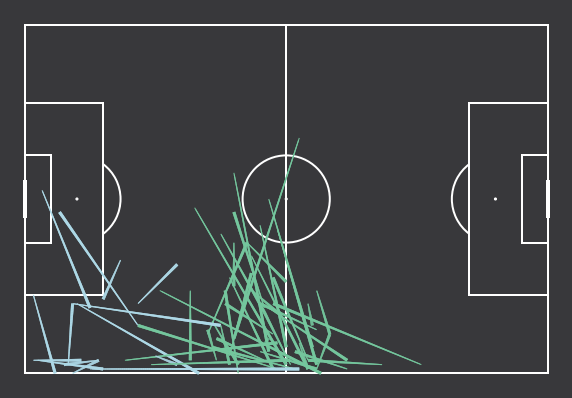

In [34]:
fig, ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#38383b')
ax.patch.set_facecolor('#38383b')

pitch = Pitch(pitch_type='statsbomb',orientation='horizontal',
             pitch_color='#38383b',line_color='white',figsize=(10,10),
             constrained_layout=False,tight_layout=True,view='full')

pitch.draw(ax=ax)

for x in range(len(df['cluster'])):
    
    if df['cluster'][x] ==0:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#74c69d',lw=3,zorder=2,comet=True,ax=ax)
        
    if df['cluster'][x] ==5:
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endX'][x],yend=df['endY'][x],
                   color='#add8e6',lw=3,zorder=2,comet=True,ax=ax)